<a href="https://colab.research.google.com/github/AndrewDavidRatnam/Feature-_Engineering_Bookcamp-/blob/main/Feature_Engineering_BookCamp_COMPAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Compas DataSet

In [52]:
compas_df = pd.read_csv("/content/compas-scores-two-years.csv")


In [53]:
compas_df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [54]:

compas_df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


<Axes: xlabel='race'>

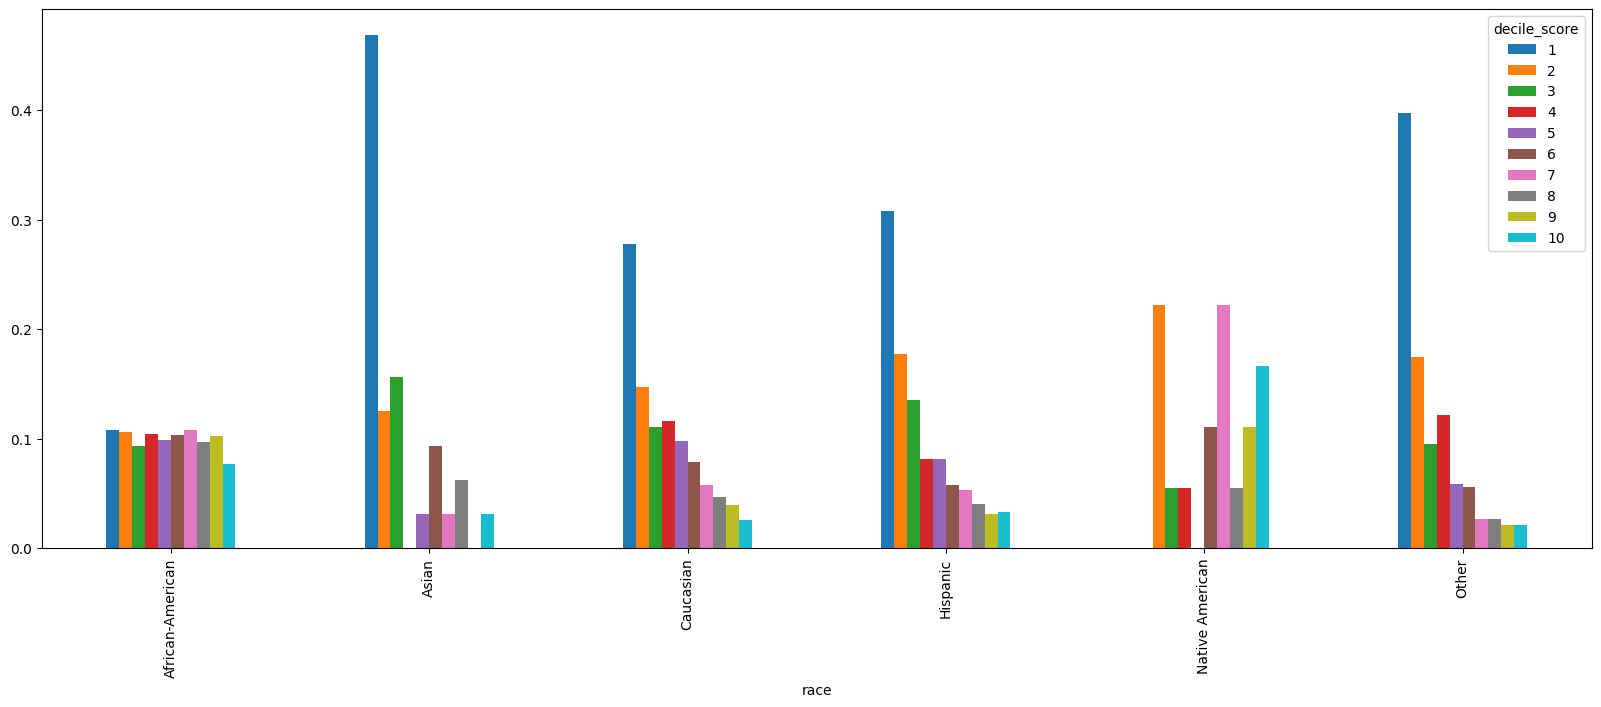

In [55]:
compas_df.groupby("race")["decile_score"].value_counts(normalize=True).unstack().plot(kind="bar",figsize=(20,7))

In [56]:
compas_df.groupby('race')['decile_score'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,3696.0,5.368777,2.831122,1.0,3.00,5.0,8.00,10.0
Asian,32.0,2.937500,2.601953,1.0,1.00,2.0,3.50,10.0
Caucasian,2454.0,3.735126,2.597926,1.0,1.00,3.0,5.00,10.0
Hispanic,637.0,3.463108,2.599100,1.0,1.00,3.0,5.00,10.0
Native American,18.0,6.166667,2.975389,2.0,3.25,7.0,8.75,10.0
Other,377.0,2.949602,2.350895,1.0,1.00,2.0,4.00,10.0


They interviewed only 32 Asian People and 18 Native Americans

## How to define the problem statement predicated by the definition of success

Basiicaly not be racist or more accurately , reverse racist or Racial Fetishism i guess idk

# Exploratory data analysis

In [57]:
compas_df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

Since There are very less data points wrt to Native Americans and Asians, we group them with other, as they cannot represent the whole of their demographic

Relabelling underrepresented races

In [58]:

compas_df.loc[compas_df['race'].isin(['Native American', 'Asian']), 'race'] = 'Other'

<Axes: title={'center': 'Actual Recidivism Rates grouped by Race'}, xlabel='race'>

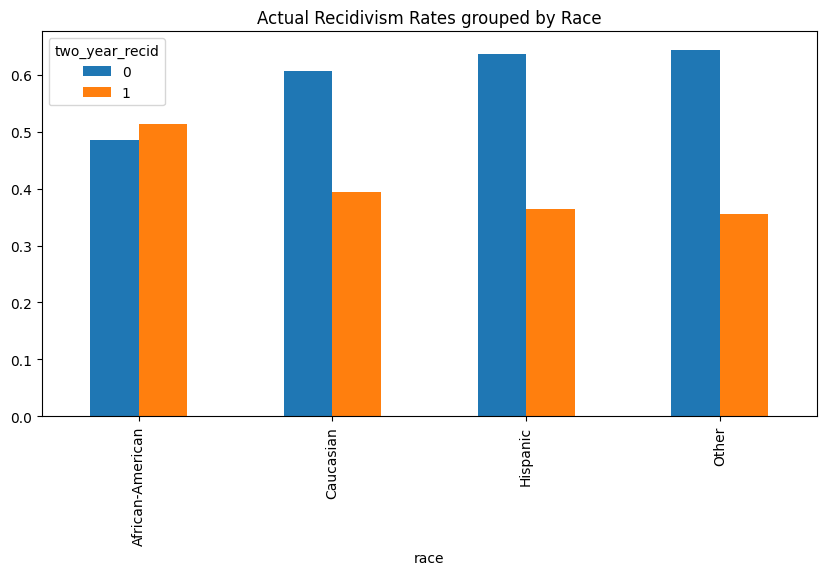

In [59]:
compas_df.groupby("race")["two_year_recid"].value_counts(normalize=True).unstack().plot(
    kind="bar",figsize=(10,5),
    title="Actual Recidivism Rates grouped by Race")


Always use Normalize=true when value counts as more data points of another category skews the EDA picture

<Axes: title={'center': 'Actual Recidivism Rates grouped by Sex'}, xlabel='sex'>

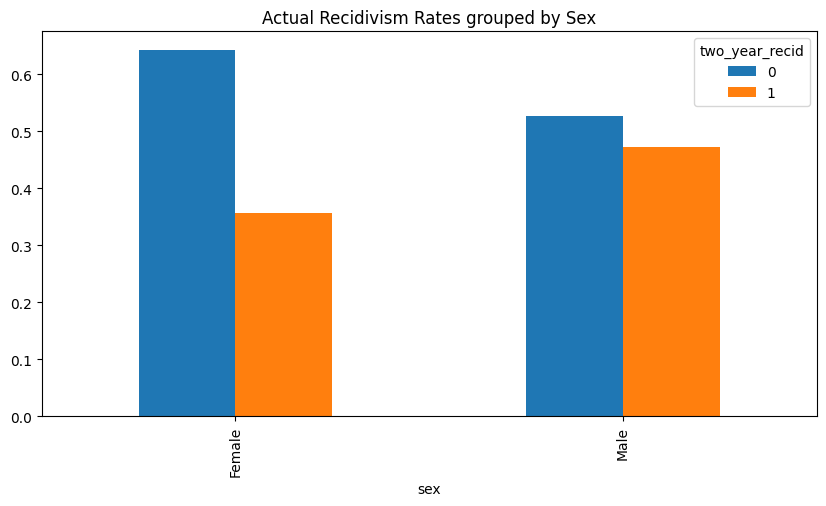

In [60]:
compas_df.groupby("sex")["two_year_recid"].value_counts(normalize=True).unstack().plot(
    kind="bar",figsize=(10,5),
    title="Actual Recidivism Rates grouped by Sex")

Charge Degree, Felony or Missed da Minor(ERN)

<Axes: title={'center': '% of Charge degree'}, xlabel='Charge Degree', ylabel='%'>

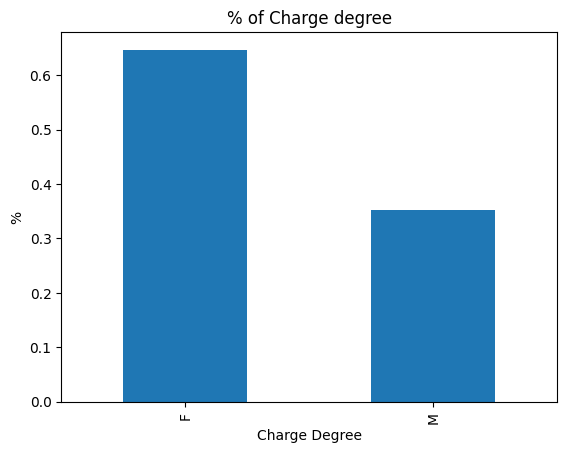

In [61]:
compas_df['c_charge_degree'].value_counts(normalize=True).plot(
    kind='bar',title="% of Charge degree",ylabel="%",xlabel="Charge Degree"
)

Remaning Quantitaive Features Histogram (age and priors count)

<Axes: title={'center': 'Histogram of Age'}, xlabel='Age', ylabel='Frequency'>

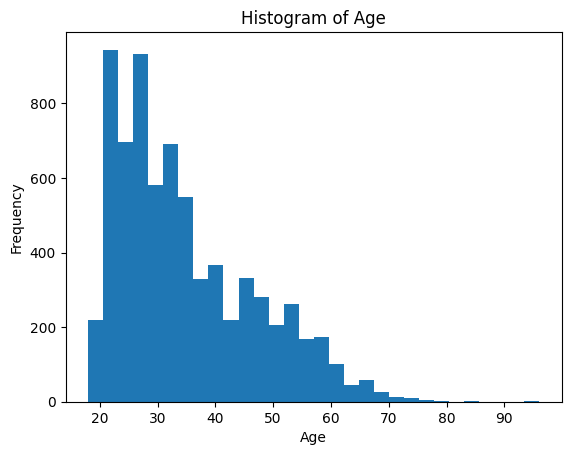

In [62]:
compas_df["age"].plot(
    title="Histogram of Age", kind="hist",xlabel="Age", bins=30
)

<Axes: title={'center': 'Histogram of Priors'}, xlabel='priors', ylabel='Frequency'>

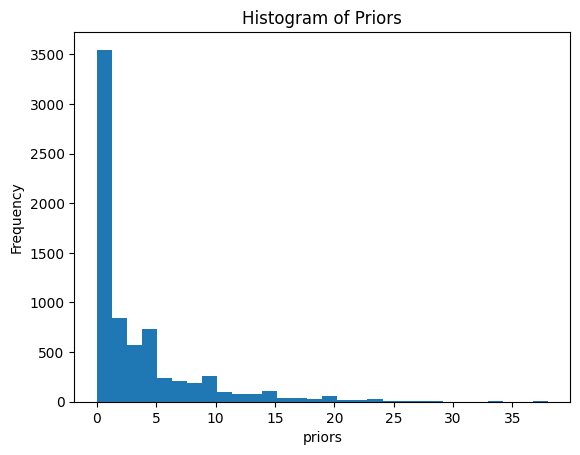

In [63]:
compas_df["priors_count"].plot(
    title="Histogram of Priors", kind="hist",xlabel="priors", bins=30
)

# Measuring bias and fairness

## Disparate treatment vs. disparate impact
 is basically uses racism to make classification Vs how the classification futher seemingly propagates racism

## Definitions of fairness

Gives a round about idea of fairness, but i think asking a model and ML algorithm to be fair is plain stupid. It depends on the data, i mean not the data itself but on how the data is collected.
<br>
Eg: you can't collect data and then just generalize, you need to collect data with an end goal in mid, here the data was collected from criminals already being prosecuted. So given that they are prosecuted, then the data was collected. So other races might have not given gotten to that stage given that they commited the same crime, either due to having better lawyers, better connections etc, a number of reasons, also population density, etc. <br> So here the data or the model is not at fault, but how it was collected, so the question is, given this information, what are the chances they would commt another crime or recscore whatever, is accurate. The only concern, is that it is not accurate for the rest of the races, so in way it is racist, not so by proactively targeting one group(African Americans), but by being dismissive of the other groups in question.<br>
Solution: Be kind, and love everyone. Give everyone the benefit of the doubt and trust the fact they are capable of good

# Building a baseline model

In [64]:
compas_df[["juv_fel_count", "juv_misd_count", "juv_other_count"]].describe()

,juv_fel_count,juv_misd_count,juv_other_count
count,7214.000000,7214.000000,7214.000000
mean,0.067230,0.090934,0.109371
std,0.473972,0.485239,0.501586
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,20.000000,13.000000,17.000000


Constructing a new juvenule offense count feature


In [65]:
compas_df = compas_df[["sex", "age", "race", "juv_fel_count", "juv_misd_count","juv_other_count", "priors_count", "c_charge_degree", "two_year_recid"]]

In [66]:
compas_df["juv_count"] = compas_df[["juv_fel_count","juv_misd_count", "juv_other_count"]].sum(axis=1)
compas_df = compas_df.drop(["juv_fel_count","juv_misd_count","juv_other_count"], axis=1)

<Axes: ylabel='Frequency'>

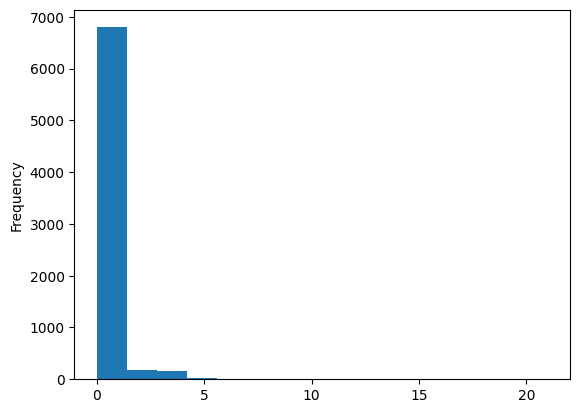

In [67]:
compas_df["juv_count"].plot(kind="hist",bins=15)

In [68]:
compas_df["juv_count"].describe()

,juv_count
count,7214.000000
mean,0.267535
std,0.952763
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,21.000000


In [69]:
compas_df.head()

,sex,age,race,priors_count,c_charge_degree,two_year_recid,juv_count
0,Male,69,Other,0,F,0,0
1,Male,34,African-American,0,F,1,0
2,Male,24,African-American,4,F,1,1
3,Male,23,African-American,1,F,0,1
4,Male,43,Other,2,F,0,0


## Building our baseline pipeline

Train Test Split and a quick model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test, race_train, race_test = train_test_split(
    compas_df.drop("two_year_recid", axis=1),
    compas_df["two_year_recid"],
    compas_df["race"],
    stratify=compas_df["two_year_recid"],
    test_size=0.3
)
classifier = RandomForestClassifier(max_depth=10, n_estimators=20, random_state=0)

creating feature columns for column transformers

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ["race","sex","c_charge_degree"]
categorical_transformers = Pipeline(
    steps=[
        ("oneHot",OneHotEncoder(drop="if_binary"))
        ]
)
numerical_features = ["age","priors_count"]
numerical_transformer = Pipeline(steps=[
    ("scale",StandardScaler())
])

In [72]:
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformers,categorical_features),
    ("num",numerical_transformer, numerical_features)
])


In [73]:
clf_tree = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier",classifier)
])

In [74]:
clf_tree.fit(X_train, y_train)
unaware_y_preds = clf_tree.predict(X_test)

## Measuring Bias in Baseline ModeL

In [75]:
%pip install dalex

In [76]:
import dalex as dx
exp_tree = dx.Explainer(
    clf_tree, X_test, y_test,
    label="Random Forest Bias Unaware",verbose=True
)
exp_tree.model_performance()

Preparation of a new explainer is initiated

  -> data              : 2165 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2165 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Bias Unaware
  -> predict function  : <function yhat_proba_default at 0x7952aa6bcfe0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0, mean = 0.445, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.963, mean = 0.00616, max = 0.997
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
Random Forest Bias Unaware,0.550205,0.637011,0.590434,0.655889,0.698144


Dalex is reporting importance in terms of drop-out loss, or how much the overall fit of our model would decrease if the feature in question were entirely removed

In [77]:
exp_tree.model_parts().plot()

This package gives us 10 metrics here by default; let’s break down how to calculate
each one in terms of true positives (TP), false positives (FP), false negatives (FN),
actual positives (AP), actual negatives (AN), predicted positives (PP), and predicted
negatives (PN)

In [78]:
mf_tree = exp_tree.model_fairness(protected=race_test, privileged = "Caucasian")
mf_tree.metric_scores

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
African-American,0.643,0.680,0.683,0.641,0.357,0.320,0.317,0.359,0.661,0.487
Caucasian,0.402,0.801,0.569,0.672,0.598,0.199,0.431,0.328,0.643,0.279
Hispanic,0.426,0.815,0.520,0.752,0.574,0.185,0.480,0.248,0.691,0.262
Other,0.511,0.708,0.533,0.689,0.489,0.292,0.467,0.311,0.630,0.378


In [79]:
mf_tree = exp_tree.model_fairness(protected=race_test, privileged = "Caucasian")
mf_tree.fairness_check()

Bias detected in 3 metrics: TPR, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Caucasian'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                       TPR       ACC       PPV       FPR       STP
African-American  1.599502  1.027994  1.200351  1.608040  1.745520
Hispanic          1.059701  1.074650  0.913884  0.929648  0.939068
Other             1.271144  0.979782  0.936731  1.467337  1.354839


In [80]:
mf_tree.plot()

/usr/local/lib/python3.12/dist-packages/dalex/fairness/_group_fairness/utils.py:209: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.



In [81]:
mf_tree.plot(type = 'stacked')

# Mitigating bias

3 ways to mitigate bias
- preprocessing : using accurate data representations and viable feature extraction techniques to mitigate bias. Ensuring group fairness, like maybe stratifying or sampling equally.
- Inprocessing: Training the model to mitigate bias while training is debatable as then you admiting you have training data is biased. Methods include meta fair classifier, priveledge aware regularization term
- Postprocessing: Highly debatable, using equalized odds and modifying classifier scores


# Building a bias-aware model

### Feature construction:
 Using the Yeo-Johnson transformer to treat the disparate impact<br>
 Meaning we transform the features so that the model output is not biased based on the input, ie the impact is not disparate due our preprocessing/inprocessing(this can be a trainable parameter too) but we just apply fit_transforms so ot is techinally preprocessing.


In [86]:
compas_df = compas_df.drop(columns=["sex"],axis=1)

In [95]:
compas_df.select_dtypes("number").corrwith(compas_df['race'] == 'African-American')

,0
age,-0.179095
priors_count,0.202897
two_year_recid,0.131200
juv_count,0.111835


Nothing is "highly" correlated lol.

Age correlation exploration

,age
race,
African-American,"Axes(0.125,0.11;0.775x0.77)"
Caucasian,"Axes(0.125,0.11;0.775x0.77)"
Hispanic,"Axes(0.125,0.11;0.775x0.77)"
Other,"Axes(0.125,0.11;0.775x0.77)"


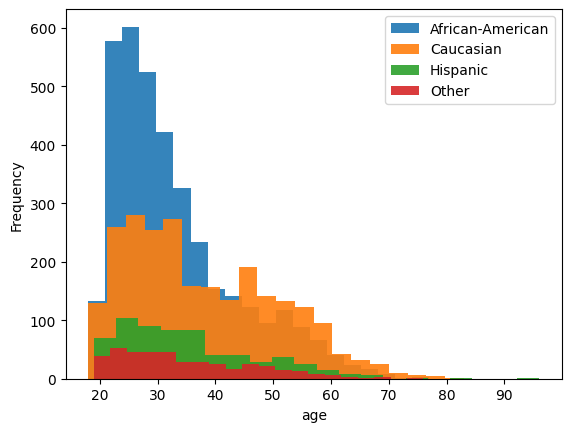

In [108]:
compas_df.groupby("race")["age"].plot(kind="hist",xlabel="age",bins=20,legend=True,alpha=0.9)

In [109]:
compas_df.groupby('race')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,3696.0,32.740801,10.858391,18.0,25.0,30.0,38.00,77.0
Caucasian,2454.0,37.726569,12.761373,18.0,27.0,35.0,47.75,83.0
Hispanic,637.0,35.455259,11.877783,19.0,26.0,33.0,43.00,96.0
Other,427.0,35.131148,11.634159,19.0,25.0,33.0,43.00,76.0


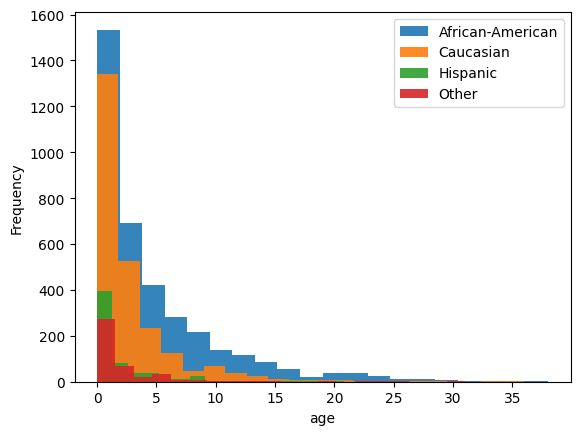

In [113]:
compas_df.groupby("race")["priors_count"].plot(kind="hist",xlabel="age",bins=20,legend=True,alpha=0.9)
plt.show()

In [114]:
compas_df.groupby("race")["priors_count"].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,3696.0,4.438853,5.579835,0.0,1.0,2.0,6.0,38.0
Caucasian,2454.0,2.586797,3.798803,0.0,0.0,1.0,3.0,36.0
Hispanic,637.0,2.252747,3.647673,0.0,0.0,1.0,2.0,26.0
Other,427.0,2.016393,3.695856,0.0,0.0,1.0,2.5,31.0


This is valid, prior count is skewed and also kind of different for different races. But this is recorded and hence the model can pick up the race from the priors count. but why is this bias?
<br>
To not give the model a (linear)correlation with race, this feature can be transformed
<br><br>
Pesudocode:
For each group label:
  - Get the subset of priors_count values for that group
  - Apply the yeo-johnson transformation to the subset
  - Modify the column in place for that group label with the new values

applying the transformation on each subset of values, rather than on the column as
a whole, we are forcing each group’s set of values to be normal with a mean of 0 and a
standard deviation of 1,aking it harder for the model to reconstruct a particular
group label from a given priors_count value

In [132]:
from sklearn.preprocessing import PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class NormalizeColumnByLabel(BaseEstimator, TransformerMixin):
  def __init__(self, col, label):
    self.col = col
    self.label = label
    self.transformer = {}

  def fit(self, X, y=None):
    for group in X[self.label].unique():
      self.transformer[group] = PowerTransformer(method="yeo-johnson",standardize=True)
      self.transformer[group].fit(
          X.loc[X[self.label] == group][self.col].values.reshape(-1,1)
      )
    return self

  def transform(self,X,y=None):
    C = X.copy()
    for group in X[self.label].unique():
      C.loc[
          X[self.label] == group, self.col
      ] = self.transformer[group].transform(X.loc[X[self.label] == group][self.col].values.reshape(-1,1))
    return C

In [133]:
n = NormalizeColumnByLabel(col='priors_count', label='race')

In [134]:
X_train_normalized = n.fit_transform(X_train, y_train)

/tmp/ipython-input-3141593968.py:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.11731738  0.39036153  0.39036153 ... -1.19166892  1.0941945
  0.39036153]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,priors_count
race,
African-American,"Axes(0.125,0.11;0.775x0.77)"
Caucasian,"Axes(0.125,0.11;0.775x0.77)"
Hispanic,"Axes(0.125,0.11;0.775x0.77)"
Other,"Axes(0.125,0.11;0.775x0.77)"


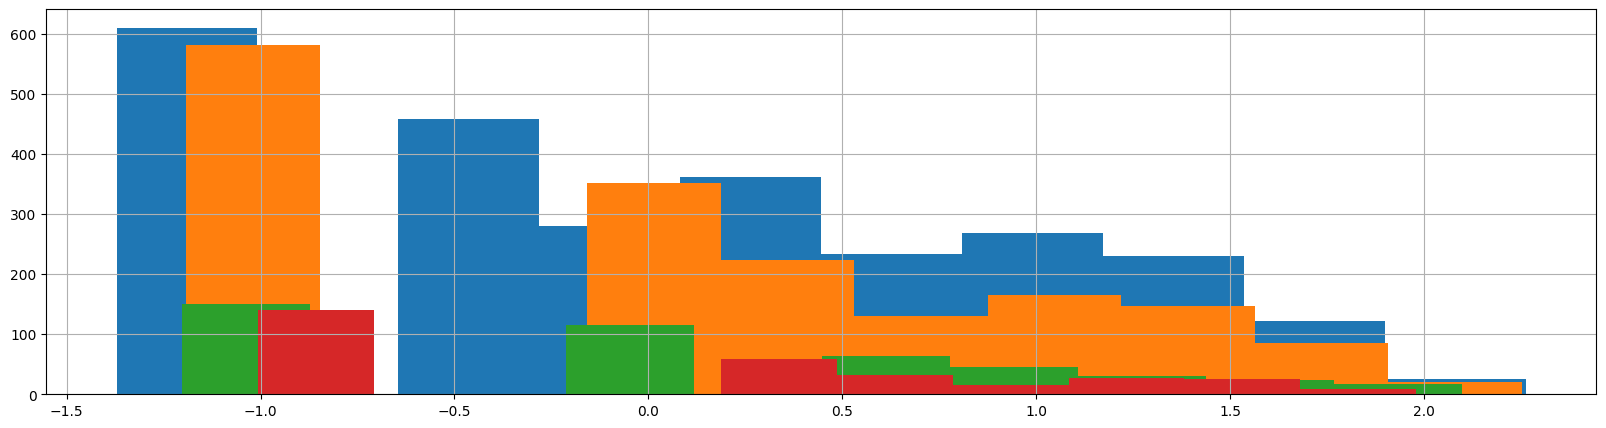

In [135]:
X_train_normalized.groupby('race')['priors_count'].hist(figsize=(20,5))

In [136]:
X_train_normalized.groupby('race')['priors_count'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,2589.0,1.152677e-16,1.000193,-1.371416,-0.543959,-0.093620,0.773692,2.262508
Caucasian,1706.0,8.329927e-18,1.000293,-1.191669,-1.191669,-0.117317,0.705416,2.253105
Hispanic,446.0,-1.991431e-16,1.001123,-1.203678,-1.203678,-0.025149,0.818606,2.098183
Other,308.0,-1.557196e-16,1.001627,-1.007001,-1.007001,0.221477,1.006095,1.979774


Putting together our first bias aware model

In [137]:
clf_tree_aware = Pipeline(steps=[
    ('normalize_priors',NormalizeColumnByLabel(
        col="priors_count", label="race")),
    ("preprocessor",preprocessor),
    ("classifier",classifier)
])

In [138]:
clf_tree_aware.fit(X_train,y_train)
aware_y_preds = clf_tree_aware.predict(X_test)



/tmp/ipython-input-3141593968.py:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.11731738  0.39036153  0.39036153 ... -1.19166892  1.0941945
  0.39036153]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipython-input-3141593968.py:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.70541624 -1.19166892  0.70541624 -0.11731738  0.70541624 -0.11731738
  0.92686166  1.4267869   0.70541624 -1.19166892 -0.11731738  0.39036153
 -1.19166892  0.39036153 -1.19166892  0.92686166 -0.11731738  1.63318665
 -0.11731738  0.70541624  1.0941945  -0.11731738  1.33546199 -1.19166892
 -1.19166892 -0.11731738  0.39036153 -1.19166892  0.39036153  1.4267869
  0.70541624 -0.11731738 -1.19166892 -0.11731738  0.70541624 -0.11731738
  0.92686166 -0.11731738 -0.11731738 -0.11731738 -0.11731738  

In [140]:
exp_tree_aware = dx.Explainer(
    clf_tree_aware,X_test,y_test,label="Random Forest DIR",verbose=False
)

/tmp/ipython-input-3141593968.py:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.70541624 -1.19166892  0.70541624 -0.11731738  0.70541624 -0.11731738
  0.92686166  1.4267869   0.70541624 -1.19166892 -0.11731738  0.39036153
 -1.19166892  0.39036153 -1.19166892  0.92686166 -0.11731738  1.63318665
 -0.11731738  0.70541624  1.0941945  -0.11731738  1.33546199 -1.19166892
 -1.19166892 -0.11731738  0.39036153 -1.19166892  0.39036153  1.4267869
  0.70541624 -0.11731738 -1.19166892 -0.11731738  0.70541624 -0.11731738
  0.92686166 -0.11731738 -0.11731738 -0.11731738 -0.11731738  1.68666444
  1.57315286  0.70541624  0.70541624  0.39036153 -0.11731738 -1.19166892
  0.70541624 -1.19166892 -0.11731738 -1.19166892 -1.19166892 -1.19166892
  1.33546199 -1.19166892  0.39036153 -0.11731738  1.0941945  -1.19166892
  1.22679214  0.92686166 -0.11731738 -1.19166892 -0.11731738  0.39036153
  1.4267869   1.0941945  -1.191

In [141]:
mf_tree_aware = exp_tree_aware.model_fairness(
protected=race_test, privileged = "Caucasian")

In [142]:
pd.concat([exp.model_performance().result for exp in [exp_tree, exp_tree_aware]])

,recall,precision,f1,accuracy,auc
Random Forest Bias Unaware,0.550205,0.637011,0.590434,0.655889,0.698144
Random Forest DIR,0.552254,0.634865,0.590685,0.654965,0.701277


In [143]:
mf_tree.plot(objects=[mf_tree_aware], type='stacked')

**Summary**  
This script performs **feature engineering and bias mitigation** on the COMPAS recidivism dataset (`compas-scores-two-years.csv`). The goal is to build a recidivism prediction model (`two_year_recid`) while explicitly addressing racial bias. It starts with standard EDA and a **bias-unaware baseline** Random Forest model, then introduces a custom **bias-aware preprocessing step** that normalizes the `priors_count` feature **separately per race** using Yeo-Johnson transformation. This reduces the model’s ability to “pick up” race from the priors distribution (disparate impact mitigation) without changing the target or removing the race column. The script uses `dalex` to quantify fairness before and after the intervention.

### All Steps Involved + Why They Were Done

1. **Data Loading & Initial Inspection**  
   - `pd.read_csv`, `df.columns`, `df.head()`, groupby `race` on `decile_score`.  
   **Why**: Understand the raw data and confirm the well-known racial imbalance in COMPAS scores.

2. **Handling Underrepresented Races**  
   - Merge “Asian” and “Native American” into “Other” because only 32 + 18 samples exist.  
   **Why**: Small groups cannot statistically represent their demographics; keeping them would create noisy/ unstable fairness metrics.

3. **Exploratory Data Analysis (EDA)**  
   - Normalized value counts & bar plots for recidivism by race/sex.  
   - Charge degree distribution, age & priors histograms.  
   **Why**: Show raw disparate impact in the data (African-Americans have higher recidivism rates and different feature distributions). Always use `normalize=True` to avoid size-based skew.

4. **Feature Construction**  
   - Sum `juv_fel_count + juv_misd_count + juv_other_count` → new column `juv_count`, then drop the three originals.  
   **Why**: Reduce dimensionality and multicollinearity while preserving all juvenile offense information.

5. **Train-Test Split**  
   - `train_test_split(..., stratify=y, test_size=0.3)` and also extract `race_train`/`race_test`.  
   **Why**: Maintain class balance in the target; keep race column separate for fairness evaluation.

6. **Baseline (Bias-Unaware) Pipeline**  
   - `ColumnTransformer`:  
     – Categorical (`race`, `sex`, `c_charge_degree`) → `OneHotEncoder(drop="if_binary")`  
     – Numerical (`age`, `priors_count`) → `StandardScaler`  
   - Wrapped in `Pipeline` with `RandomForestClassifier(max_depth=10, n_estimators=20)`.  
   **Why**: Standard preprocessing + simple model to establish a baseline performance and bias level.

7. **Bias Measurement with Dalex**  
   - `dx.Explainer`, `model_performance()`, `model_parts()` (feature importance), `model_fairness(protected=race_test, privileged="Caucasian")`.  
   - Fairness metrics, `fairness_check()`, stacked plots.  
   **Why**: Quantify disparate impact / equalized odds across racial groups using a dedicated fairness library.

8. **Bias-Aware Feature Engineering (Core Contribution)**  
   - Custom transformer `NormalizeColumnByLabel`:  
     – For each race group, fit a separate `PowerTransformer(method="yeo-johnson", standardize=True)` on `priors_count`.  
     – Transform each group independently so that priors become ~N(0,1) **within every race**.  
   **Why**: Priors count is heavily correlated with race. By normalizing **per group**, we destroy the linear correlation between the feature and the protected attribute, making it much harder for the model to reconstruct race from priors (pre-processing bias mitigation). This is a form of “group-wise standardization” to reduce disparate impact while keeping the feature informative for recidivism.

9. **Bias-Aware Pipeline & Re-evaluation**  
   - New pipeline: `NormalizeColumnByLabel` → original preprocessor → classifier.  
   - Refit, predict, and compare fairness metrics/plots with the baseline.  
   **Why**: Demonstrate that the custom step improves fairness (lower disparity in metrics) with minimal loss in overall performance.

10. **Final Comparison**  
    - Performance tables and stacked fairness plots for both models.  
    **Why**: Visually and numerically show the effect of the bias-mitigation technique.

### Packages / Modules / Techniques Used

| Package / Module                          | Class / Function / Technique                  | Why It Was Used |
|-------------------------------------------|-----------------------------------------------|-----------------|
| **pandas**                                | `read_csv`, `groupby`, `loc`, `drop`, `corrwith` | Core data loading, manipulation, and grouping for EDA and feature engineering |
| **numpy**                                 | (implicit via pandas)                         | Underlying numerical operations |
| **matplotlib.pyplot**                     | `plot(kind="bar")`, `hist`, `show`            | All visualizations (histograms, bar plots, fairness plots) |
| **sklearn.model_selection**               | `train_test_split` (with `stratify`)          | Stratified split to preserve recidivism class balance |
| **sklearn.ensemble**                      | `RandomForestClassifier`                      | Baseline (and aware) classifier – interpretable tree-based model |
| **sklearn.compose**                       | `ColumnTransformer`                           | Apply different transformers to categorical vs numerical columns in one step |
| **sklearn.pipeline**                      | `Pipeline`, `FeatureUnion` (imported but not used) | Chain preprocessing + model; reusable and clean code |
| **sklearn.preprocessing**                 | `OneHotEncoder(drop="if_binary")`<br>`StandardScaler`<br>`PowerTransformer(method="yeo-johnson")` | One-hot for race/sex/charge; scale age/priors; **group-wise Yeo-Johnson** to normalize priors per race |
| **sklearn.base**                          | `BaseEstimator`, `TransformerMixin`           | Create custom scikit-learn compatible transformer `NormalizeColumnByLabel` |
| **dalex**                                 | `Explainer`, `model_performance`, `model_parts`, `model_fairness`, `fairness_check`, `plot` | Comprehensive bias/fairness analysis (10+ metrics, feature importance via dropout loss, fairness plots) |

**Key Technique Highlight**  
The most important custom technique is the **group-wise Yeo-Johnson normalization** (`NormalizeColumnByLabel`). It is a **pre-processing bias-mitigation** method that forces each racial group’s `priors_count` distribution to be identical (mean 0, std 1), thereby breaking the statistical link between the feature and the protected attribute while preserving the predictive signal for recidivism.

This completes the full feature-engineering + bias-mitigation workflow shown in the script.